## Outline:
* Define a logistic regression
* State and explain the formula and it's variables
* Get a dataset
* Build a logistic function and explain its effect 
* Train the model
* Test the model
* Interprete the Logistic Regression 
Table
* Summary


## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.The possible outcomes of a logistic regression are not numerical but
rather categorical ( 1 or 0, Yes or No ) etc.

Even though a Logistic regression is seen as a generalized linear model, It is a linear model with a link function that maps the output of linear multiple regression to a posterior probability of each class (0,1) using the **logistic
sigmoid function.**

## The Logistic Regression Formla


## $p(X)/1 −p (X)    = e ( β 0 +β 1 X 1 +...+β k X k )$

Where,

$p(X)$ = Probability of the dsitribution

$e$ = Base of the Natural Log

$β0$  = Biase or Intercept

$β1$  = Coefficient

$X1$ = Independenet variable

## **ODDS** = $p (X)/1 −p (X)$

The logistic regression model is not very useful in itself. The right-hand side of the model is an exponent which is very computationally inefficient and generally hard to grasp.

When we talk about a *logistic regression* what we usually mean is **logit regression** – which is a variation of the model where we have taken the log of both sides. See formula below:

## $log(p(X)/1 −p(X)) = log(e(β 0 + β 1 x + ⋯ β k x k))$

On the right hand side, log cancels 'e(exponential)' function leavig us with our new formula:

## $log(p(X)/1 −p(X)) = β 0 + β 1 x + ⋯ β k x k$

With odds:

## $log (odds) = β 0 + β 1 x + ⋯ β k x k$

We'll implemt all these in the code section of the project.



## Code Implementation

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## DATA

Our dataset is not a real life data, it was made for the purpose of this challenge. 
We ain to predict whether a stuent will get admitted based on the cummulative points of students in their secondary school courses.

The bench mark is 1700 points for a student to get admitted and anything short of that will not be admitted.

In [64]:
data = pd.read_csv('Admittance.csv')

In [65]:
data.head()

,Score,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [66]:
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})

In [63]:
data.head()

,Score,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


## Variables

In [39]:
X = data['Score'] # Independent variable
y = data['Admitted'] # Dependent variable

## PLOT

Let's plot the data to see its distribution before building our logistic function

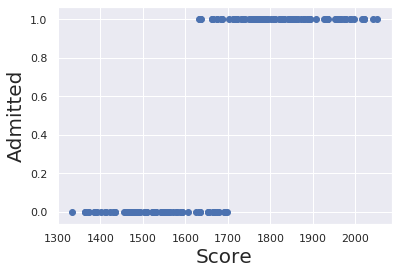

In [67]:
# Create a scatter plot of x (Scores) and y (Admitted)
plt.scatter(X,y, color='C0')
plt.xlabel('Score', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

Observe from above plot that, values above 1700 fall under the value of 1(admitted). Therea are a few cases of outliers in our data.

## The Logit Function
Here, we are going to call the Logit function from statsmodel and fit it on our data

In [79]:
x_const = sm.add_constant(X)
reg_log = sm.Logit(y,x_const)
result = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


## Logistic Summary

In [80]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.7992
Time:                        10:45:34   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Interpreting the Log Table

From the table abve, you can see that our function was able to identify 'Admitted'as the dependent variable. The model used is a Logit regression, while the method is Maximum Likelihood Estimation (Maximum likelihood estimation is a method that determines values for the parameters of a model.). It has clearly converged after classifyin 168 observations.

The Pseudo R-squared is 0.80 which is within the 'acceptable region'. Pseudo R2 is a measure of how well variables of the model explain some phenomenon. If we have a pseudo-R value more than 0.5 then can form our expectation for the model.

The Admitted variable is highly significant and its coefficient is 1.

The constant is also significant and equals: -69.9


## Logistic formula

Let's covert the logistic regression formula to a python function

In [81]:
def log_form(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

## Sorting

In [84]:
# The params valeus are comming from when we fitted our logit function on the data above
f_sorted = np.sort(log_form(X,result.params[0],result.params[1]))
x_sorted = np.sort(np.array(X))

## Plot a Logistic Curve


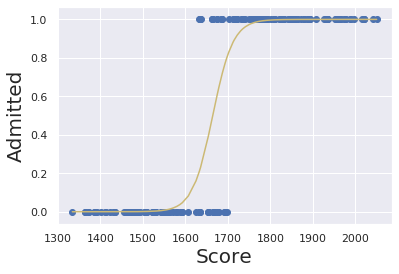

In [78]:
plt.scatter(X,y,color='C0')
plt.xlabel('Score', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

You can observe that our function fitted well on our data and even ignored the outliered values.

## Testing the Model

In [89]:
result.predict()

array([0.00, 1.00, 1.00, 0.38, 0.05, 0.98, 0.99, 1.00, 1.00, 0.03, 1.00,
       1.00, 0.50, 0.00, 0.77, 1.00, 0.21, 0.22, 0.23, 1.00, 1.00, 1.00,
       0.00, 0.00, 0.91, 1.00, 0.22, 1.00, 1.00, 0.98, 0.00, 0.61, 0.41,
       1.00, 1.00, 1.00, 0.50, 1.00, 0.39, 0.00, 0.04, 0.20, 1.00, 0.00,
       1.00, 0.00, 0.98, 0.00, 0.00, 0.01, 0.01, 1.00, 0.80, 0.01, 1.00,
       0.00, 0.56, 0.95, 0.22, 0.99, 0.01, 0.89, 1.00, 1.00, 0.99, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.89, 0.22, 0.00, 1.00, 1.00, 1.00, 0.00,
       0.49, 1.00, 1.00, 0.01, 1.00, 1.00, 0.65, 1.00, 1.00, 0.00, 1.00,
       0.99, 0.72, 0.60, 0.00, 0.95, 0.91, 0.00, 1.00, 1.00, 0.01, 0.98,
       0.88, 0.99, 0.00, 0.99, 0.03, 0.00, 0.99, 0.99, 1.00, 0.00, 0.00,
       0.04, 0.52, 0.00, 1.00, 0.16, 0.00, 0.92, 0.00, 0.47, 1.00, 1.00,
       0.02, 0.00, 0.00, 1.00, 0.01, 0.96, 0.75, 0.72, 0.94, 0.60, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.08, 0.00, 0.01, 1.00, 0.98, 0.70,
       0.99, 1.00, 0.02, 0.00, 0.00, 0.00, 0.83, 1.

The above predicted values shows that probability of a value being a 1 or 0. The first observation (0.0) shows an a hundread percent accuracy of a number being a 0 which implies no admission, while the secsond observation shows a hundread percent accuracy of a student being admitted with a value of 1. Other values which are neither  1 or 0 are outliers which are not fully sure of which of the class they belong to. This was visually seen in our plot above.